In [2]:
! pip install hvplot

In [38]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [60]:
# Load the data into a Pandas DataFrame
market_data_df = pd.read_csv(
    "../content/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [5]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [6]:
# Plot your data to see what's in your DataFrame


---

### Prepare the Data

In [7]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(market_data_df[['price_change_percentage_24h', 'price_change_percentage_7d',
                                                                   'price_change_percentage_14d', 'price_change_percentage_30d',
                                                                   'price_change_percentage_60d', 'price_change_percentage_200d',
                                                                   'price_change_percentage_1y']]
                                                    )
market_data_scaled[0:3]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051]])

In [8]:
# Create a DataFrame with the scaled data
market_data_scaled_df = pd.DataFrame(market_data_scaled, columns = ['price_change_percentage_24h', 'price_change_percentage_7d',
                                                                   'price_change_percentage_14d', 'price_change_percentage_30d',
                                                                   'price_change_percentage_60d', 'price_change_percentage_200d',
                                                                   'price_change_percentage_1y'])
market_data_scaled_df

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
5,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
6,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
7,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
8,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351
9,0.448952,-0.190684,-0.248043,0.051634,-0.529666,-0.532961,-0.206029


In [9]:
# Copy the crypto names from the original data
market_data_scaled_df['coin_id']= market_data_df.index

# Set the coinid column as index
market_data_scaled_df = market_data_scaled_df.set_index('coin_id')

# Display sample data
market_data_scaled_df.sample(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
usd-coin,0.034352,-0.733026,-0.023140,-0.065775,0.002925,-0.550599,-0.282232
tron,0.130050,-0.041018,0.147155,-0.543776,0.120116,-0.241118,-0.234014
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
zcash,-0.127467,0.929119,0.677532,0.223834,-0.437068,-0.265163,-0.214829
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
stellar,-0.277543,-0.385209,-0.153243,-0.371816,-0.656403,-0.353387,-0.270874
tezos,-0.151583,0.708196,0.258012,-0.602296,-0.956049,-0.449211,-0.168479
true-usd,0.078038,-0.687745,-0.009191,-0.058214,0.007388,-0.550441,-0.281747
ontology,-0.409044,-0.906963,-1.298986,-1.393153,-0.696937,-0.422835,-0.292344


---

### Find the Best Value for k Using the Original Data.

In [10]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))

In [11]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
  k_model = KMeans(n_clusters=i, random_state=1)
  k_model.fit(market_data_scaled_df)
  inertia.append(k_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [12]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}
# Create a DataFrame with the data to plot the Elbow curve
elbow_market_data_scaled_df = pd.DataFrame(elbow_data)
elbow_market_data_scaled_df.head()

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.405923


<Axes: xlabel='k'>

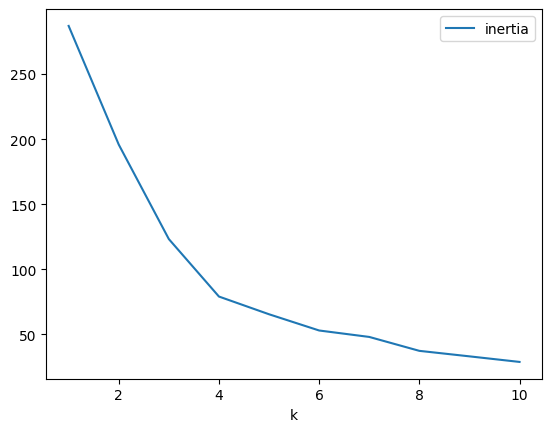

In [13]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_market_data_scaled_df.plot('k', 'inertia')

#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:** 4 is the best value for k

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [102]:
# Initialize the K-Means model using the best value for k
k_model_market_data= KMeans(n_clusters=4, random_state = 1)

In [103]:
# Fit the K-Means model using the scaled data
k_model_market_data.fit(market_data_scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [104]:
# Predict the clusters to group the cryptocurrencies using the scaled data
market_data_pred_df = k_model_market_data.predict(market_data_scaled_df)

# Print the resulting array of cluster values.
market_data_pred_df

array([3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 3, 1, 1, 2, 1, 1, 1, 1],
      dtype=int32)

In [105]:
# Create a copy of the DataFrame
market_data_df_copy = market_data_scaled_df.copy()

In [106]:
# Add a new column to the DataFrame with the predicted clusters
market_data_df_copy['k_pred_clusters'] = market_data_pred_df

# Display sample data
market_data_df_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,k_pred_clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

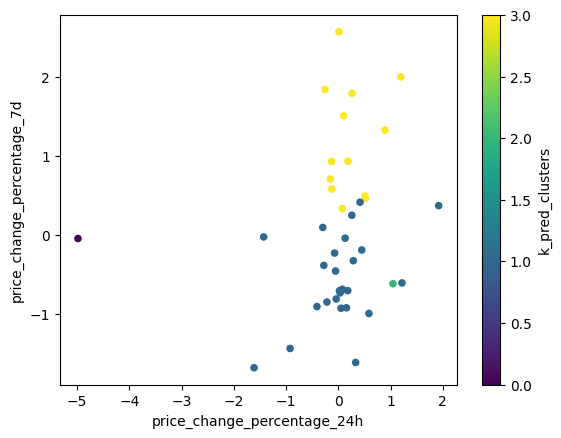

In [107]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

x = market_data_df_copy['price_change_percentage_24h']
y = market_data_df_copy['price_change_percentage_7d']
col = market_data_df_copy['k_pred_clusters']

market_data_df_copy.plot.scatter(x='price_change_percentage_24h',y='price_change_percentage_7d',c='k_pred_clusters', cmap='viridis')

---

### Optimize Clusters with Principal Component Analysis.

In [108]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components = 3)

In [109]:
# Use the PCA model with `fit_transform` to reduce to
# three principal components.
pca_market = pca.fit_transform(market_data_scaled_df)
# View the first five rows of the DataFrame.
pca_market[0:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [110]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** About 0.88, so 88% is the total explained variance of the three principal components.

In [111]:
# Create a new DataFrame with the PCA data.
pca_market_df = pd.DataFrame(pca_market, columns = ['PC1', 'PC2', 'PC3'])
# Creating a DataFrame with the PCA data
# Copy the crypto names from the original data
pca_market_df['coin_id']= market_data_df.index

# # Set the coinid column as index
pca_market_df = pca_market_df.set_index('coin_id')

# # Display sample data
pca_market_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [112]:
# Create a list with the number of k-values from 1 to 11
k2 = list(range(1,11))

In [113]:
# Create an empty list to store the inertia values
inertia2 = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k2_model = KMeans(n_clusters=i, random_state=0)
    k2_model.fit(pca_market_df)
    inertia2.append(k2_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [114]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data2 = {"k2": k2, "inertia2": inertia2}
# Create a DataFrame with the data to plot the Elbow curve
elbow2_market_df = pd.DataFrame(elbow_data2)
elbow2_market_df.head()

,k2,inertia2
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.878747


<Axes: xlabel='k2'>

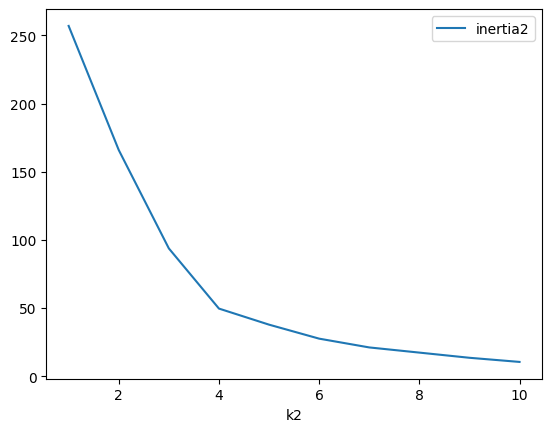

In [115]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow2_market_df.plot('k2','inertia2')

#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No difference

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [116]:
# Initialize the K-Means model using the best value for k
k4 = KMeans(n_clusters=4, random_state=1)

In [117]:
# Fit the K-Means model using the PCA data
k4.fit(pca_market_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [118]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k4_pred = k4.predict(pca_market_df)

# Print the resulting array of cluster values.
k4_pred

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 3, 0, 0, 0, 0],
      dtype=int32)

In [119]:
# Create a copy of the DataFrame with the PCA data
market_k4_df = pca_market_df.copy()

# Add a new column to the DataFrame with the predicted clusters
market_k4_df['k4_pred'] = k4_pred

# Display sample data
market_k4_df.sample(5)

,PC1,PC2,PC3,k4_pred
coin_id,,,,
ethereum-classic,-0.579924,-0.356334,-0.114942,0
nem,0.608974,0.563532,-1.148742,0
huobi-token,-0.407483,-0.212507,-0.351426,0
vechain,-0.556315,-1.938209,-1.261776,0
theta-token,2.676868,-0.013954,-1.965207,0


<Axes: xlabel='PC1', ylabel='PC2'>

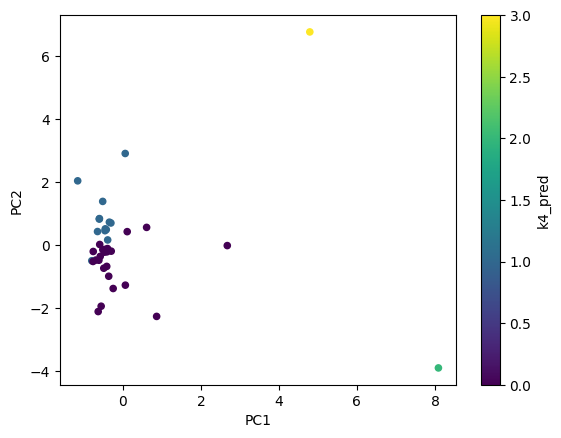

In [120]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
x = market_k4_df['PC1']
y = market_k4_df['PC2']
col = market_k4_df['k4_pred']

market_k4_df.plot.scatter(x='PC1',y='PC2',c='k4_pred', cmap='viridis')

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

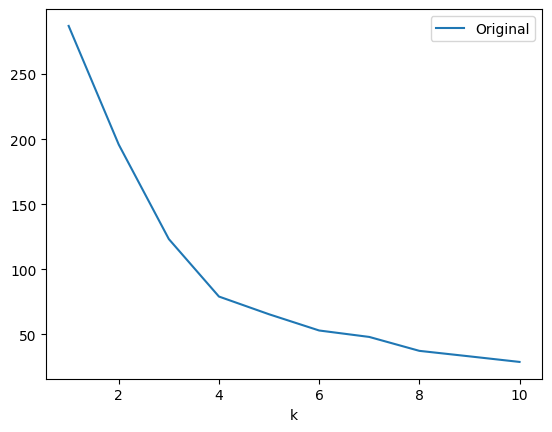

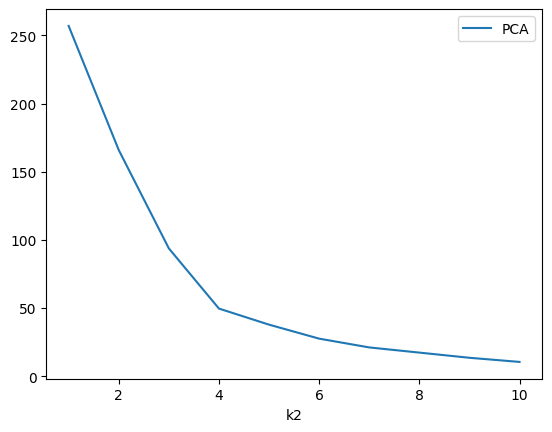

In [125]:
# Composite plot to contrast the Elbow curves
elbow_original = elbow_market_data_scaled_df.plot('k', 'inertia', label = 'Original')
elbow_pca = elbow2_market_df.plot('k2','inertia2', label = 'PCA')

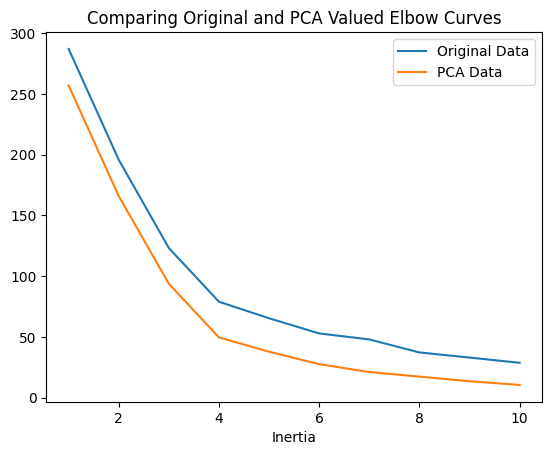

In [130]:
# Composite plot to contrast the clusters
composite_elbow = plt.gca()
composite_elbow.set_xlabel('Number of Clusters(K)')
composite_elbow.set_xlabel('Inertia')
composite_elbow.set_title('Comparing Original and PCA Valued Elbow Curves')


#Add the plots to the composite
composite_elbow.plot(elbow_original.get_lines()[0].get_xdata(), elbow_original.get_lines()[0].get_ydata(), label='Original Data')
composite_elbow.plot(elbow_pca.get_lines()[0].get_xdata(), elbow_pca.get_lines()[0].get_ydata(), label='PCA Data')

composite_elbow.legend()

plt.show()


#### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features to cluster the data using K-Means has no significant impact on the clusters